To start the data analysis, a ProcessGameState object was created and the parquet file was read into the data variable.

Unneeded columns are removed to increase efficiency and the df is filtered further into df's where the team is only Team2 and side is only T

In [1]:
from process_game_state import ProcessGameState

processor = ProcessGameState('data\game_state_frame_data.parquet')
data = processor.get_df()

required_cols = ['round_num', 'tick', 'side', 'is_alive', 'x', 'y', 'z', 'inventory', 'area_name', 'seconds', 'bomb_planted', 'player']

team2_data = processor.filter_by_team(data, 'Team2')
team2_data = processor.remove_unneeded_cols(team2_data, required_cols)
team2_data = team2_data.reset_index(drop=True)

team2_t_data = processor.filter_by_side(team2_data, 'T')
team2_t_data = team2_t_data.reset_index(drop=True)
team2_t_data

,round_num,tick,side,is_alive,x,y,z,inventory,area_name,seconds,bomb_planted,player
0,16,286888,T,True,-1310,-3332,294,"[{'ammo_in_magazine': 13, 'ammo_in_reserve': 2...",TSpawn,0,False,Player5
1,16,286904,T,True,-1303,-3319,293,"[{'ammo_in_magazine': 13, 'ammo_in_reserve': 2...",TSpawn,0,False,Player5
2,16,286920,T,True,-1293,-3297,291,"[{'ammo_in_magazine': 13, 'ammo_in_reserve': 2...",TSpawn,0,False,Player5
3,16,286936,T,True,-1280,-3272,289,"[{'ammo_in_magazine': 13, 'ammo_in_reserve': 2...",TSpawn,0,False,Player5
4,16,286952,T,True,-1267,-3245,286,"[{'ammo_in_magazine': 13, 'ammo_in_reserve': 2...",TSpawn,1,False,Player5
...,...,...,...,...,...,...,...,...,...,...,...,...
54905,30,514156,T,False,-1508,-372,200,None,Water,41,False,Player9
54906,30,514172,T,False,-1508,-372,200,None,Water,41,False,Player9
54907,30,514188,T,False,-1508,-372,200,None,Water,42,False,Player9
54908,30,514204,T,False,-1508,-372,200,None,Water,42,False,Player9


a. Is entering via the light blue boundary a common strategy used by Team2 on T (terrorist) side?

Answer: No, entering via the light blue boundary is not a common strategy used by Team2 on T. Only Player5 and Player9 enter SnipersNest in round 16 in the entirety of Team2’s T side.

In [2]:
polygon_coordinates = [[-1735, 250], [-2024, 398], [-2806, 742], [-2472, 1233], [-1565, 580]]
z_bound = [285, 421]

snipersnest_data = processor.filter_by_polygon(team2_t_data, polygon_coordinates, z_bound)
snipersnest_data.reset_index(drop=True)

,round_num,tick,side,is_alive,x,y,z,inventory,area_name,seconds,bomb_planted,player
0,16,298025,T,True,-2139,681,300,"[{'ammo_in_magazine': 10, 'ammo_in_reserve': 1...",SnipersNest,30,True,Player5
1,16,298041,T,True,-2163,668,305,"[{'ammo_in_magazine': 9, 'ammo_in_reserve': 18...",SnipersNest,30,True,Player5
2,16,298057,T,True,-2186,656,299,"[{'ammo_in_magazine': 9, 'ammo_in_reserve': 18...",SnipersNest,30,True,Player5
3,16,298249,T,True,-2221,911,286,"[{'ammo_in_magazine': 4, 'ammo_in_reserve': 18...",SnipersNest,32,True,Player5
4,16,298265,T,True,-2226,910,305,"[{'ammo_in_magazine': 4, 'ammo_in_reserve': 18...",SnipersNest,32,True,Player5
5,16,298281,T,True,-2230,911,312,"[{'ammo_in_magazine': 4, 'ammo_in_reserve': 18...",SnipersNest,32,True,Player5
6,16,298297,T,True,-2230,916,306,"[{'ammo_in_magazine': 4, 'ammo_in_reserve': 18...",SnipersNest,32,True,Player5
7,16,298313,T,True,-2231,919,288,"[{'ammo_in_magazine': 13, 'ammo_in_reserve': 9...",SnipersNest,32,True,Player5
8,16,298057,T,True,-2183,907,296,"[{'ammo_in_magazine': 20, 'ammo_in_reserve': 1...",SnipersNest,30,True,Player9
9,16,298073,T,True,-2202,934,310,"[{'ammo_in_magazine': 20, 'ammo_in_reserve': 1...",SnipersNest,31,True,Player9


b. What is the average timer that Team2 on T (terrorist) side enters “BombsiteB” with least 2 rifles or SMGs?

I begin by filtering the team2_t_data to see where the condition of the team having at least 2 rifles or smgs is True. I do this by first extracting the weapon_classes from the inventory column. Then I use the assign function to find where the condition is true by looking at the new weapon_classes column and comparing it to the classes list. Getting the first row of each round allows us to see each total buy of the players after the buy phase and sorting by the tick sorts by chronological order.

In [3]:
classes = ['Rifle', 'SMG']

team2_t_data_with_weapons = processor.extract_weapon_classes(team2_t_data)
team2_t_data_with_weapons = team2_t_data_with_weapons.assign(match=team2_t_data_with_weapons['weapon_classes'].apply(lambda x: any(item in classes for item in x)))
team2_t_data_with_weapons = processor.get_first_row_of_each_round(team2_t_data_with_weapons)
team2_t_data_with_weapons = team2_t_data_with_weapons.sort_values('tick')
team2_t_data_with_weapons = team2_t_data_with_weapons.reset_index(drop=True)
team2_t_data_with_weapons

,round_num,tick,side,is_alive,x,y,z,inventory,area_name,seconds,bomb_planted,player,weapon_classes,match
0,16,286888,T,True,-1310,-3332,294,"[{'ammo_in_magazine': 13, 'ammo_in_reserve': 2...",TSpawn,0,False,Player5,[Pistols],False
1,16,286888,T,True,-1569,-3126,294,"[{'ammo_in_magazine': 20, 'ammo_in_reserve': 1...",TSpawn,0,False,Player9,[Pistols],False
2,16,286888,T,True,-1452,-3333,296,"[{'ammo_in_magazine': 20, 'ammo_in_reserve': 1...",TSpawn,0,False,Player7,[Pistols],False
3,16,286888,T,True,-1461,-3188,293,"[{'ammo_in_magazine': 20, 'ammo_in_reserve': 1...",TSpawn,0,False,Player8,[Pistols],False
4,16,286888,T,True,-1270,-3260,288,"[{'ammo_in_magazine': 1, 'ammo_in_reserve': 0,...",TSpawn,0,False,Player6,"[Grenade, Grenade, Pistols]",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,30,508876,T,True,-1499,-3126,291,"[{'ammo_in_magazine': 20, 'ammo_in_reserve': 1...",TSpawn,0,False,Player6,"[Pistols, Rifle, Grenade]",True
71,30,508876,T,True,-1539,-3066,290,"[{'ammo_in_magazine': 1, 'ammo_in_reserve': 0,...",TSpawn,0,False,Player5,"[Grenade, Pistols, Rifle, Grenade, Grenade]",True
72,30,508876,T,True,-1463,-3190,293,"[{'ammo_in_magazine': 35, 'ammo_in_reserve': 9...",TSpawn,0,False,Player8,"[Rifle, Grenade, Pistols]",True
73,30,508876,T,True,-1327,-3262,289,"[{'ammo_in_magazine': 20, 'ammo_in_reserve': 1...",TSpawn,0,False,Player7,"[Pistols, Rifle, Grenade, Grenade]",True


Next, I keep a count of how many players pass the condition for each round. The count is filtered by if it is => 2 and then I keep a list of all the rounds where this condition is true.

In [4]:
counts = team2_t_data_with_weapons.groupby('round_num')['match'].sum()
filtered_counts = counts[counts >= 2]

rounds_where_condition_is_true = filtered_counts.index.tolist()
rounds_where_condition_is_true

[17, 18, 19, 21, 23, 24, 25, 26, 28, 29, 30]

Then we look at all the times of where Team2 on T was in BombsiteB where bomb_planted = false, since the seconds resets after bomb plant and the team has to enter the site first before planting. I get the first rows again, because we want to see when the players first entered the site.

In [5]:
t_bombsiteb_data = processor.filter_by_area_name(team2_t_data, ['BombsiteB'])
t_bombsiteb_data = t_bombsiteb_data[t_bombsiteb_data['bomb_planted'] == False]
t_bombsiteb_data = t_bombsiteb_data.reset_index(drop=True)
t_bombsiteb_data = processor.get_first_row_of_each_round(t_bombsiteb_data)
t_bombsiteb_data = t_bombsiteb_data.sort_values('tick')
t_bombsiteb_data = t_bombsiteb_data.reset_index(drop=True)
t_bombsiteb_data

,round_num,tick,side,is_alive,x,y,z,inventory,area_name,seconds,bomb_planted,player
0,16,292664,T,True,-956,-265,96,"[{'ammo_in_magazine': 20, 'ammo_in_reserve': 1...",BombsiteB,45,False,Player8
1,16,292984,T,True,-1065,-217,99,"[{'ammo_in_magazine': 17, 'ammo_in_reserve': 1...",BombsiteB,48,False,Player9
2,16,293384,T,True,-724,-3,50,"[{'ammo_in_magazine': 9, 'ammo_in_reserve': 26...",BombsiteB,51,False,Player5
3,16,293496,T,True,-700,123,38,"[{'ammo_in_magazine': 8, 'ammo_in_reserve': 12...",BombsiteB,52,False,Player6
4,21,358856,T,True,-897,-297,96,"[{'ammo_in_magazine': 30, 'ammo_in_reserve': 9...",BombsiteB,19,False,Player8
5,21,359112,T,True,-902,-296,96,"[{'ammo_in_magazine': 20, 'ammo_in_reserve': 1...",BombsiteB,21,False,Player5
6,25,441436,T,True,-874,-304,96,"[{'ammo_in_magazine': 30, 'ammo_in_reserve': 9...",BombsiteB,30,False,Player5
7,26,459804,T,True,-740,-122,58,"[{'ammo_in_magazine': 20, 'ammo_in_reserve': 1...",BombsiteB,103,False,Player5
8,28,482620,T,True,-717,-3,47,"[{'ammo_in_magazine': 20, 'ammo_in_reserve': 1...",BombsiteB,28,False,Player6
9,28,482748,T,True,-721,-15,49,"[{'ammo_in_magazine': 20, 'ammo_in_reserve': 1...",BombsiteB,29,False,Player8


So now that we have the list of rounds where the team had two or more rifles and we know when the team entered BombsiteB, we can simply 'combine' the two using the isin function.

I define "enters" as when the first member of team enters BombsiteB, so we look at the first round rows again to find the first player that entered BombsiteB for each round.

In [6]:
t_bombsiteb_data = t_bombsiteb_data[t_bombsiteb_data['round_num'].isin(rounds_where_condition_is_true)]
t_bombsiteb_data = t_bombsiteb_data.reset_index(drop=True)
t_bombsiteb_data = processor.get_first_row_of_each_round(t_bombsiteb_data)
t_bombsiteb_data

,round_num,tick,side,is_alive,x,y,z,inventory,area_name,seconds,bomb_planted,player
0,21,358856,T,True,-897,-297,96,"[{'ammo_in_magazine': 30, 'ammo_in_reserve': 9...",BombsiteB,19,False,Player8
2,25,441436,T,True,-874,-304,96,"[{'ammo_in_magazine': 30, 'ammo_in_reserve': 9...",BombsiteB,30,False,Player5
3,26,459804,T,True,-740,-122,58,"[{'ammo_in_magazine': 20, 'ammo_in_reserve': 1...",BombsiteB,103,False,Player5
4,28,482620,T,True,-717,-3,47,"[{'ammo_in_magazine': 20, 'ammo_in_reserve': 1...",BombsiteB,28,False,Player6
9,30,513452,T,True,-1001,-248,98,"[{'ammo_in_magazine': 20, 'ammo_in_reserve': 1...",BombsiteB,36,False,Player8


Finally, we simply get the mean of 'seconds' column of t_bombsiteb_data.

In [7]:
mean_of_seconds = t_bombsiteb_data['seconds'].mean()
mean_of_seconds

43.2

c. Now that we’ve gathered data on Team2 T side, let's examine their CT (counter-terrorist) Side. Using the same data set, tell our coaching staff where you suspect them to be waiting inside “BombsiteB”
    i. Hint: Try a heatmap

Using seaborn and matplotlib, a heatmap was plotted with the image of overpass as the background. We filter the team2_data by CT side and filter it again by BombsiteB area_name.

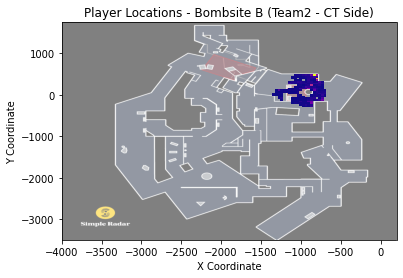

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

team2_ct_data = processor.filter_by_side(team2_data, 'CT')

area_names = ['BombsiteB']

rows_in_area = processor.filter_by_area_name(team2_ct_data, area_names)
rows_in_area = rows_in_area[rows_in_area['is_alive'] == True]

image_path = 'map\de_overpass_radar.jpeg'
image = plt.imread(image_path)

heatmap = sns.histplot(data=rows_in_area, x='x', y='y', bins=20, cmap='plasma')
heatmap_extent = [-4000, 200, -3500, 1750]
ax = plt.gca()
ax.imshow(image, extent=heatmap_extent, alpha=0.5, aspect='auto')

plt.title("Player Locations - Bombsite B (Team2 - CT Side)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

plt.show()

We can see even more locations by adding more area_names to our list of areas.

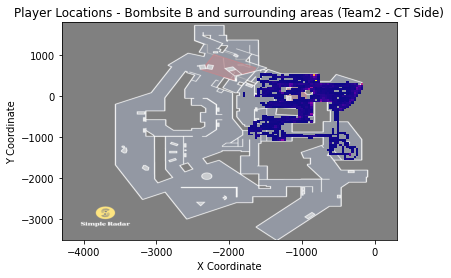

In [9]:
area_names = ['BombsiteB', 'Canal', 'Water', 'Bridge', 'Construction', 'Pipe']

rows_in_area = processor.filter_by_area_name(team2_ct_data, area_names)
rows_in_area = rows_in_area[rows_in_area['is_alive'] == True]

heatmap = sns.histplot(data=rows_in_area, x='x', y='y', bins=50, cmap='plasma')
heatmap_extent = [-4300, 300, -3501, 1806]
ax = plt.gca()
ax.imshow(image, extent=heatmap_extent, alpha=0.5, aspect='auto')

plt.title("Player Locations - Bombsite B and surrounding areas (Team2 - CT Side)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

plt.show()